In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score as roc_auc

# Create pipelines
from fedot.core.pipelines.pipeline import Pipeline
from fedot.core.pipelines.node import PrimaryNode, SecondaryNode

# Tasks to solve
from fedot.core.repository.tasks import Task, TaskTypesEnum

# Dataclass for wrapping arrays into it
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup

# Type of the input data
from fedot.core.repository.dataset_types import DataTypesEnum

In [143]:
df = pd.read_csv('/Users/vadim/Desktop/FEDOT Intro/playground-series-s4e1/train.csv', index_col='id')
new_data = pd.read_csv('/Users/vadim/Desktop/FEDOT Intro/playground-series-s4e1/test.csv', index_col='id')
sample_submission = pd.read_csv('/Users/vadim/Desktop/FEDOT Intro/playground-series-s4e1/sample_submission.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [136]:
new_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...
275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38


In [9]:
task = Task(TaskTypesEnum.classification)

data = InputData.from_dataframe(df.drop('Exited', axis=1),
                                df.Exited,
                                task=Task(TaskTypesEnum.classification),
                                data_type=DataTypesEnum.table
                               )
train, test = train_test_data_setup(data)

## API solution

In [28]:
from fedot.api.main import Fedot

fedot_model = Fedot(problem='classification', 
                    # timeout=1, preset='fast_train',
                    seed=20, logging_level=0)

# During fit, the pipeline composition algorithm is started
pipeline = fedot_model.fit(train)

2024-10-10 17:03:20,441 - AssumptionsHandler - Initial pipeline fitting started
2024-10-10 17:06:42,265 - PipelineNode - Trying to fit pipeline node with operation: rf
2024-10-10 17:06:42,269 - PipelineNode - Fit all parent nodes in secondary node with operation: rf
2024-10-10 17:06:42,269 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-10 17:09:30,737 - PipelineNode - Obtain prediction in pipeline node by operation: rf
2024-10-10 17:09:30,740 - PipelineNode - Fit all parent nodes in secondary node with operation: rf
2024-10-10 17:09:30,741 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-10 17:09:32,878 - AssumptionsHandler - Initial pipeline was fitted successfully
2024-10-10 17:09:32,878 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 612.2 MiB, max: 11001.1 MiB
2024-10-10 17:09:32,890 - ApiComposer - Initial pipeline was fitted in 1875.1 sec.
2024-10-10 17:09:32,891 

2024-10-10 17:09:32,934 - type - Random State: numpy.random.get_state() follows...
('MT19937', array([        20, 1888926693, 1765876982, 2587673718, 2923926984,
       1642934967, 3182585812, 1875803509, 4224094924, 4052857524,
       1579184445, 3892955319,  892371728, 1203193181,  351312218,
        779332241,  266396741, 4156947530, 1730058719, 3967582889,
        968001318,  130852883,  909474453,  935729632,  975246712,
       3654463601, 2611650324, 1527613897, 1334535172, 3534234390,
       3903788135, 1035505555,  262885407,  558904156, 1201962862,
       2619452910, 4040223296, 2074036116, 3560504047, 2771864387,
       1088256461, 2183346597,  961617421, 1416679500, 3726009229,
        989742387, 3250493517, 2178274549, 2937468067, 1381231798,
        298537829, 3097228300, 3750021050, 3226717490,   37105035,
       3230423822,  225763673, 2435090774,   36971102, 1569185105,
       1765417164,   18327070, 1225562132, 2481864072, 3266519474,
       1166738454, 2779376725, 197

2024-10-10 17:09:32,935 - ApiComposer - Timeout is too small for composing and is skipped because fit_time is 1875.12201 sec.
2024-10-10 17:09:34,099 - DataSourceSplitter - K-folds cross validation is applied.
2024-10-10 17:09:34,101 - ApiComposer - Time for pipeline composing was 0:00:00.
The remaining 1.3 seconds are not enough to tune the hyperparameters.
2024-10-10 17:09:34,101 - ApiComposer - Composed pipeline returned without tuning.
2024-10-10 17:09:34,291 - ApiComposer - Model generation finished
2024-10-10 17:09:34,884 - FEDOT logger - Already fitted initial pipeline is used
2024-10-10 17:09:34,885 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [rf, scaling]}
rf - {'n_jobs': 8}
scaling - {}
2024-10-10 17:09:34,885 - MemoryAnalytics - Memory consumption for finish in main session: current 612.2 MiB, max: 11001.1 MiB


In [29]:
pipeline.print_structure()

Pipeline structure:
{'depth': 2, 'length': 2, 'nodes': [rf, scaling]}
rf - {'n_jobs': 8}
scaling - {}


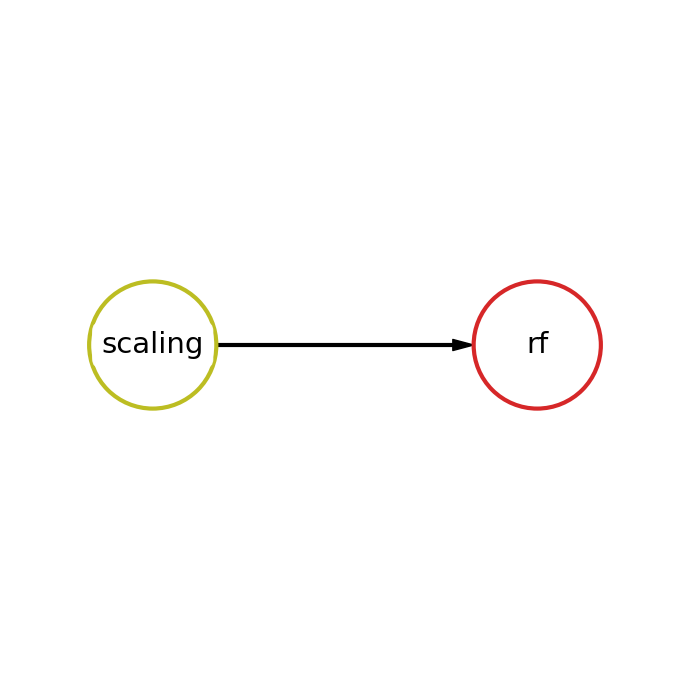

In [30]:
pipeline.show()

In [31]:
prediction = fedot_model.predict(test)
print(pipeline)
print(f'ROC AUC score on training sample: {roc_auc(test.target, prediction):.3f}')

2024-10-10 17:09:38,138 - PipelineNode - Obtain prediction in pipeline node by operation: rf
2024-10-10 17:09:38,139 - PipelineNode - Fit all parent nodes in secondary node with operation: rf
2024-10-10 17:09:38,139 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
{'depth': 2, 'length': 2, 'nodes': [rf, scaling]}
ROC AUC score on training sample: 0.733


## Core-based solution

In [34]:
import datetime

# Dataclass for wrapping arrays into it
from fedot.core.data.data import InputData

# Tasks to solve
from fedot.core.repository.tasks import Task, TaskTypesEnum

# Type of the input data
from fedot.core.repository.dataset_types import DataTypesEnum

# Repository with operations in the FEDOT
from fedot.core.repository.operation_types_repository import get_operations_for_task

# Pipeline of the FEDOT
from fedot.core.pipelines.pipeline import Pipeline

# Evolutionary algorithm classes 
from fedot.core.composer.composer_builder import ComposerBuilder
from fedot.core.composer.gp_composer.gp_composer import PipelineComposerRequirements
from golem.core.optimisers.genetic.gp_params import GPAlgorithmParameters
from golem.core.optimisers.genetic.operators.inheritance import GeneticSchemeTypesEnum
from fedot.core.repository.metrics_repository import ClassificationMetricsEnum

In [35]:
# The search of the models provided by the framework that can be used as nodes in a pipeline for the selected task
available_model_types = ['scaling', 'bernb', 'dt', 'knn', 'lda', 'logit', 'mlp', 'qda', 'rf', 'xgboost', 'catboost']

# The choice of the metric for the pipeline quality assessment during composition
metric_function = ClassificationMetricsEnum.ROCAUC_penalty

In [36]:
# The choice and initialisation of the GP search
timeout = datetime.timedelta(minutes=1)
composer_requirements = PipelineComposerRequirements(
    primary=available_model_types,
    secondary=available_model_types, 
    max_arity=3,
    max_depth=3, 
    timeout=timeout,
    cv_folds=2)

In [37]:
from fedot.core.composer.gp_composer.specific_operators import parameter_change_mutation
from golem.core.optimisers.genetic.operators.mutation import MutationTypesEnum

In [38]:
# GP optimiser parameters choice
scheme_type = GeneticSchemeTypesEnum.parameter_free
mutation_types = [parameter_change_mutation, MutationTypesEnum.growth, MutationTypesEnum.reduce, MutationTypesEnum.simple]
graph_opt_params = GPAlgorithmParameters(
    genetic_scheme_type=scheme_type,
    mutation_types=mutation_types,
    crossover_prob=0.8,
    mutation_prob=0.8)

# Create builder for composer and set composer params
builder = ComposerBuilder(task=task).\
    with_requirements(composer_requirements).\
    with_optimizer_params(graph_opt_params).\
    with_metrics(metric_function)

# Create GP-based composer
composer = builder.build()

# the optimal pipeline generation by composition - the most time-consuming task
pipeline_evo_composed = composer.compose_pipeline(data=train)

2024-10-10 19:16:53,767 - GraphVerifier - Graph verification failed with error <Invalid pipeline configuration: Root operation is not a model> for rule=<function has_final_operation_as_model at 0x163f96700> on graph=(/n_bernb;;/n_dt;;/n_lda;)/n_scaling.
2024-10-10 19:16:53,773 - GraphVerifier - Graph verification failed with error <Invalid pipeline configuration: Current pipeline can not solve multitask problem> for rule=<function has_no_conflicts_during_multitask at 0x163f96de0> on graph=(/n_dt;;/n_logit;;/n_logit;)/n_lda.
2024-10-10 19:16:53,793 - GraphVerifier - Graph verification failed with error <Invalid pipeline configuration: Root operation is not a model> for rule=<function has_final_operation_as_model at 0x163f96700> on graph=(/n_dt;;/n_qda;;/n_xgboost;)/n_scaling.
2024-10-10 19:16:53,815 - GraphVerifier - Graph verification failed with error <Invalid pipeline configuration: Root operation is not a model> for rule=<function has_final_operation_as_model at 0x163f96700> on grap

2024-10-10 19:16:53,940 - type - Random State: numpy.random.get_state() follows...
('MT19937', array([        20, 1888926693, 1765876982, 2587673718, 2923926984,
       1642934967, 3182585812, 1875803509, 4224094924, 4052857524,
       1579184445, 3892955319,  892371728, 1203193181,  351312218,
        779332241,  266396741, 4156947530, 1730058719, 3967582889,
        968001318,  130852883,  909474453,  935729632,  975246712,
       3654463601, 2611650324, 1527613897, 1334535172, 3534234390,
       3903788135, 1035505555,  262885407,  558904156, 1201962862,
       2619452910, 4040223296, 2074036116, 3560504047, 2771864387,
       1088256461, 2183346597,  961617421, 1416679500, 3726009229,
        989742387, 3250493517, 2178274549, 2937468067, 1381231798,
        298537829, 3097228300, 3750021050, 3226717490,   37105035,
       3230423822,  225763673, 2435090774,   36971102, 1569185105,
       1765417164,   18327070, 1225562132, 2481864072, 3266519474,
       1166738454, 2779376725, 197

2024-10-10 19:16:54,127 - DataSourceSplitter - K-folds cross validation is applied.


Generations: 0gen [00:00, ?gen/s]

2024-10-10 19:16:54,144 - MultiprocessingDispatcher - Number of used CPU's: 1
2024-10-10 19:16:54,146 - PipelineObjectiveEvaluate - Pipeline (/n_qda;;/n_scaling;)/n_bernb fit started
2024-10-10 19:17:02,787 - PipelineNode - Trying to fit pipeline node with operation: bernb
2024-10-10 19:17:02,789 - PipelineNode - Fit all parent nodes in secondary node with operation: bernb
2024-10-10 19:17:02,790 - PipelineNode - Trying to fit pipeline node with operation: qda
2024-10-10 19:18:11,306 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-10 19:18:26,197 - PipelineNode - Obtain prediction in pipeline node by operation: bernb
2024-10-10 19:18:26,199 - PipelineNode - Fit all parent nodes in secondary node with operation: bernb
2024-10-10 19:18:26,199 - PipelineNode - Obtain prediction in pipeline node by operation: qda
2024-10-10 19:18:39,015 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-10 19:18:49,134 - PipelineNode - Trying to f

Generations: 0gen [03:39, ?gen/s]

2024-10-10 19:20:33,508 - OptimisationTimer - Composition time: 3.656 min
2024-10-10 19:20:33,508 - OptimisationTimer - Algorithm was terminated due to processing time limit
2024-10-10 19:20:33,509 - EvoGraphOptimizer - Generation num: 3 size: 1
2024-10-10 19:20:33,509 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<roc_auc_pen=-0.847 node_number=0.300>']
2024-10-10 19:20:33,509 - EvoGraphOptimizer - no improvements for 2 iterations
2024-10-10 19:20:33,510 - EvoGraphOptimizer - spent time: 3.7 min
2024-10-10 19:20:33,511 - GPComposer - GP composition finished


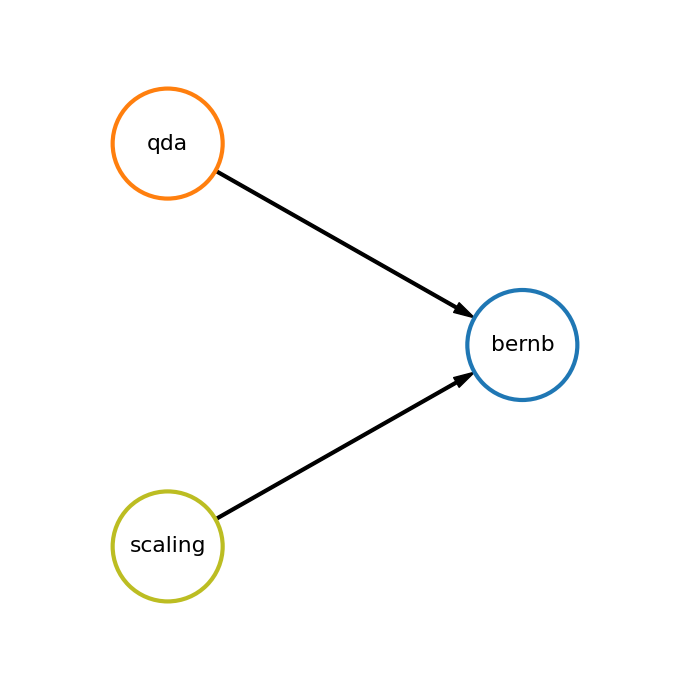

In [70]:
pipeline_evo_composed.show()

In [41]:
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from golem.core.tuning.simultaneous import SimultaneousTuner
from fedot.core.repository.metrics_repository import  ClassificationMetricsEnum

In [42]:
tuner = TunerBuilder(train.task)\
        .with_tuner(SimultaneousTuner)\
        .with_metric(ClassificationMetricsEnum.ROCAUC)\
        .with_iterations(20) \
        .build(train)
tuned_pipeline = tuner.tune(pipeline_evo_composed)

#final fit on all data
tuned_pipeline.fit(train)
print('Pipeline tuned')

2024-10-10 19:21:11,563 - DataSourceSplitter - Hold out validation is applied.
2024-10-10 19:21:11,993 - SimultaneousTuner - Hyperparameters optimization start: estimation of metric for initial graph
2024-10-10 19:21:11,994 - PipelineObjectiveEvaluate - Pipeline (/n_qda;;/n_scaling;)/n_bernb fit started
2024-10-10 19:21:28,560 - PipelineNode - Trying to fit pipeline node with operation: bernb
2024-10-10 19:21:28,563 - PipelineNode - Fit all parent nodes in secondary node with operation: bernb
2024-10-10 19:21:28,563 - PipelineNode - Trying to fit pipeline node with operation: qda
2024-10-10 19:22:31,039 - PipelineObjectiveEvaluate - Unsuccessful pipeline fit during fitness evaluation. Skipping the pipeline. Exception <SVD did not converge> on (/n_qda;;/n_scaling;)/n_bernb
2024-10-10 19:22:31,119 - SimultaneousTuner - Initial graph: {'depth': 2, 'length': 3, 'nodes': [bernb, qda, scaling]}
bernb - {}
qda - {}
scaling - {} 
Initial metric: [inf]
2024-10-10 19:22:31,120 - SimultaneousTune

In [87]:
prediction = tuned_pipeline.predict(test)
print(f'ROC AUC score on training sample: {roc_auc(test.target, prediction.predict):.3f}')

2024-10-11 12:58:09,561 - PipelineNode - Obtain prediction in pipeline node by operation: bernb
2024-10-11 12:58:09,563 - PipelineNode - Fit all parent nodes in secondary node with operation: bernb
2024-10-11 12:58:09,564 - PipelineNode - Obtain prediction in pipeline node by operation: qda
2024-10-11 12:58:15,629 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
ROC AUC score on training sample: 0.853


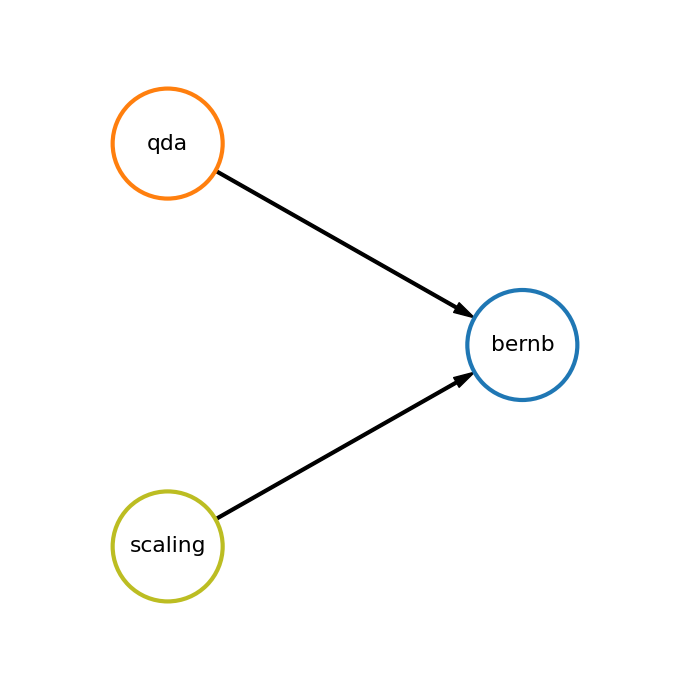

In [45]:
tuned_pipeline.show()